This is a data analysis of all the male player stats from the new FC 24 game, a continuation of FIFA 23.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("/Users/johnharmer/Desktop/Springboard/Craft a Story from a Dataset/male_players.csv")

# Display basic information and the first few rows of dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15845 non-null  int64  
 1   Name            15845 non-null  object 
 2   Nation          15845 non-null  object 
 3   Club            15845 non-null  object 
 4   Position        15845 non-null  object 
 5   Age             15845 non-null  int64  
 6   Overall         15845 non-null  int64  
 7   Pace            15845 non-null  int64  
 8   Shooting        15845 non-null  int64  
 9   Passing         15845 non-null  int64  
 10  Dribbling       15845 non-null  int64  
 11  Defending       15845 non-null  int64  
 12  Physicality     15845 non-null  int64  
 13  Acceleration    15845 non-null  int64  
 14  Sprint          15845 non-null  int64  
 15  Positioning     15845 non-null  int64  
 16  Finishing       15845 non-null  int64  
 17  Shot            15845 non-null 

(None,
    Unnamed: 0             Name     Nation             Club Position  Age  \
 0           0    Kylian Mbappé     France         Paris SG       ST   24   
 1           1   Erling Haaland     Norway  Manchester City       ST   23   
 2           2  Kevin De Bruyne    Belgium  Manchester City       CM   32   
 3           3     Lionel Messi  Argentina   Inter Miami CF       CF   36   
 4           4    Karim Benzema     France       Al Ittihad       CF   35   
 
    Overall  Pace  Shooting  Passing  ...  Strength  Aggression  Att work rate  \
 0       91    97        90       80  ...        77          64           High   
 1       91    89        93       66  ...        93          87           High   
 2       91    72        88       94  ...        74          75           High   
 3       90    80        87       90  ...        68          44            Low   
 4       90    79        88       83  ...        82          63         Medium   
 
    Def work rate  Preferred foot  

In [3]:
# Determine how many NA's are in the dataset.
df.isna().sum()

Unnamed: 0            0
Name                  0
Nation                0
Club                  0
Position              0
Age                   0
Overall               0
Pace                  0
Shooting              0
Passing               0
Dribbling             0
Defending             0
Physicality           0
Acceleration          0
Sprint                0
Positioning           0
Finishing             0
Shot                  0
Long                  0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free                  0
Curve                 0
Agility               0
Balance               0
Reactions             0
Ball                  0
Composure             0
Interceptions         0
Heading               0
Def                   0
Standing              0
Sliding               0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Att work rate         0
Def work rate         0
Preferred foot  

In [4]:
# Goal Keeper's(GK) are in a column of their own and I only want to focus on outfield players, so drop GK's.
df = df.drop(columns=['GK'], axis=1)
df.count()

Unnamed: 0        15845
Name              15845
Nation            15845
Club              15845
Position          15845
Age               15845
Overall           15845
Pace              15845
Shooting          15845
Passing           15845
Dribbling         15845
Defending         15845
Physicality       15845
Acceleration      15845
Sprint            15845
Positioning       15845
Finishing         15845
Shot              15845
Long              15845
Volleys           15845
Penalties         15845
Vision            15845
Crossing          15845
Free              15845
Curve             15845
Agility           15845
Balance           15845
Reactions         15845
Ball              15845
Composure         15845
Interceptions     15845
Heading           15845
Def               15845
Standing          15845
Sliding           15845
Jumping           15845
Stamina           15845
Strength          15845
Aggression        15845
Att work rate     15845
Def work rate     15845
Preferred foot  

In [5]:
# Show basic data summary
df.describe()

,Unnamed: 0,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,...,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
count,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,...,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,7922.000000,25.848659,66.321174,68.133481,54.140738,58.532281,56.299085,50.868602,65.456990,64.718208,...,52.105901,47.356706,49.067529,46.766551,66.413253,63.646134,65.551089,56.506911,2.950836,2.400442
std,4574.201843,4.677433,6.685503,10.721206,13.716321,9.595001,18.827593,16.280992,9.567424,15.461586,...,17.413084,20.360315,21.073506,20.615001,11.655169,16.451648,12.546027,16.856847,0.678906,0.784708
min,0.000000,17.000000,47.000000,27.000000,19.000000,25.000000,5.000000,15.000000,29.000000,14.000000,...,5.000000,4.000000,8.000000,7.000000,27.000000,15.000000,22.000000,11.000000,1.000000,1.000000
25%,3961.000000,22.000000,62.000000,62.000000,44.000000,52.000000,51.000000,36.000000,59.000000,57.000000,...,45.000000,30.000000,30.000000,27.000000,59.000000,57.000000,58.000000,46.000000,3.000000,2.000000
50%,7922.000000,25.000000,66.000000,69.000000,57.000000,59.000000,62.000000,55.000000,66.000000,68.000000,...,55.000000,54.000000,57.000000,54.000000,68.000000,67.000000,67.000000,60.000000,3.000000,2.000000
75%,11883.000000,29.000000,70.000000,75.000000,64.000000,65.000000,68.000000,64.000000,72.000000,75.000000,...,64.000000,64.000000,66.000000,64.000000,75.000000,75.000000,74.000000,69.000000,3.000000,3.000000
max,15844.000000,43.000000,91.000000,97.000000,93.000000,94.000000,96.000000,89.000000,90.000000,97.000000,...,93.000000,91.000000,91.000000,90.000000,95.000000,95.000000,96.000000,95.000000,5.000000,5.000000


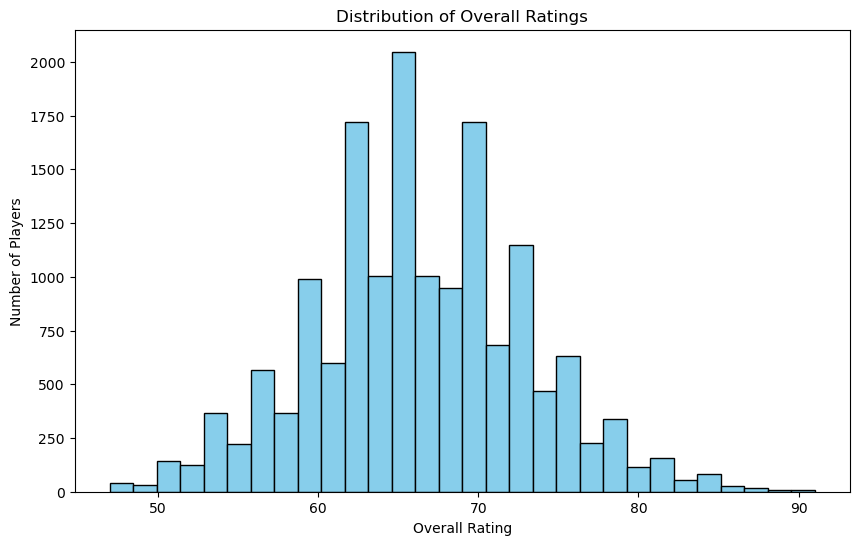

In [6]:
# Display distribution of "Overall" Rating
plt.figure(figsize=(10, 6))
df['Overall'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.grid(False)
plt.show()

<b>Distribution of Overall Ratings:</b>
The histogram above shows the distribution of overall ratings for the players. The majority of players are clustered around the 60-80 rating range, with few players having ratings above 85.



In [7]:
# Show top-rated players by position
top_players_by_position = df.groupby('Position')['Overall'].max().reset_index()
top_players_by_position_sorted = top_players_by_position.sort_values(by='Overall', ascending=False)
top_players_by_position_sorted

,Position,Overall
4,CM,91
14,ST,91
3,CF,90
5,GK,90
1,CB,89
2,CDM,89
8,LW,89
12,RW,89
0,CAM,88
6,LB,86


<b>Top-rated Players by Position:</b>
The table above lists the maximum overall ratings for players in various positions:
Central Midfielder (CM) and Striker (ST): Both have the highest rating of 91.
Center Forward (CF): Maximum rating is 90.
Goalkeeper (GK): Maximum rating is also 90.
Defenders (CB, LB, RB): Maximum ratings range from 86 to 89.
This indicates that top-rated players are well-distributed across different positions, with midfielders and forwards generally having the highest ratings.

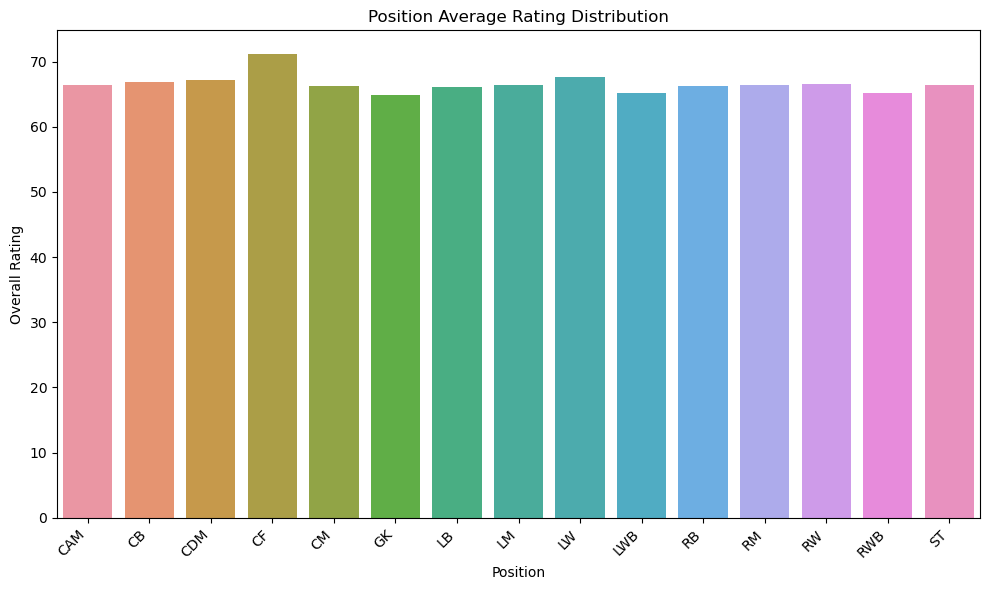

In [8]:
# Display Average Rating by Position
position_rating = df.groupby('Position')['Overall'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x = position_rating.index, y = position_rating.values)
plt.title('Position Average Rating Distribution')
plt.xlabel('Position')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

<b>Position Average Rating:</B> The average rating is evenly distributed across all positions around 66, with a slightly higher average for CF's at 71.</b>

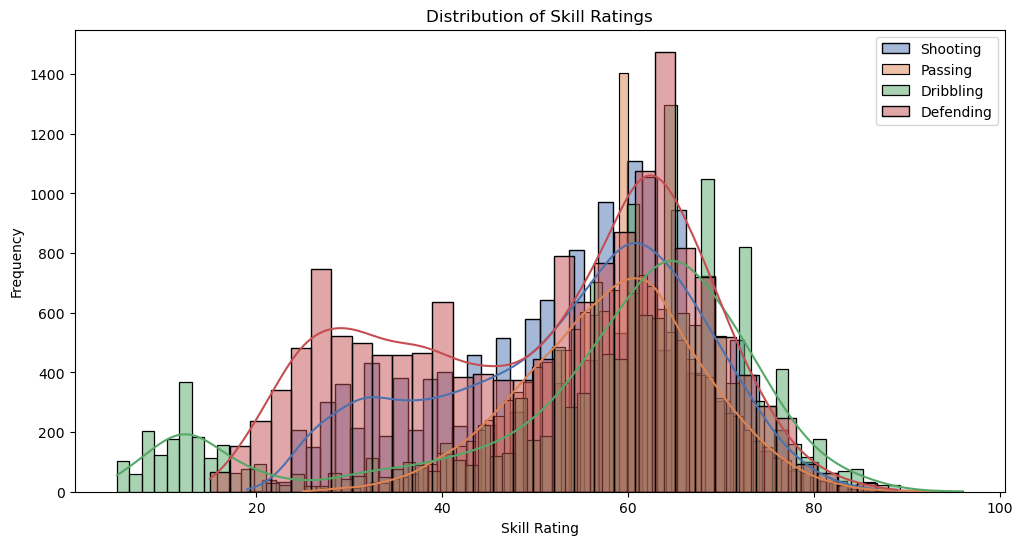

In [9]:
# Display the correlation between Skill and Overall Rating

skill_columns = ['Shooting', 'Passing', 'Dribbling', 'Defending']
colors = sns.color_palette("deep", len(skill_columns))
plt.figure(figsize=(12, 6))

for skill, color in zip(skill_columns, colors):
    sns.histplot(df[skill], kde=True, label=skill, color=color)

plt.title('Distribution of Skill Ratings')
plt.xlabel('Skill Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<b>Distribution of Skill Ratings:</b> The skills more associated with attacking (i.e. shooting, passing, and dribbling) are distributed 
much less than defending. More attack-minded players who possess all three of these skills at a high level are more rare, and therefore 
valued higher.

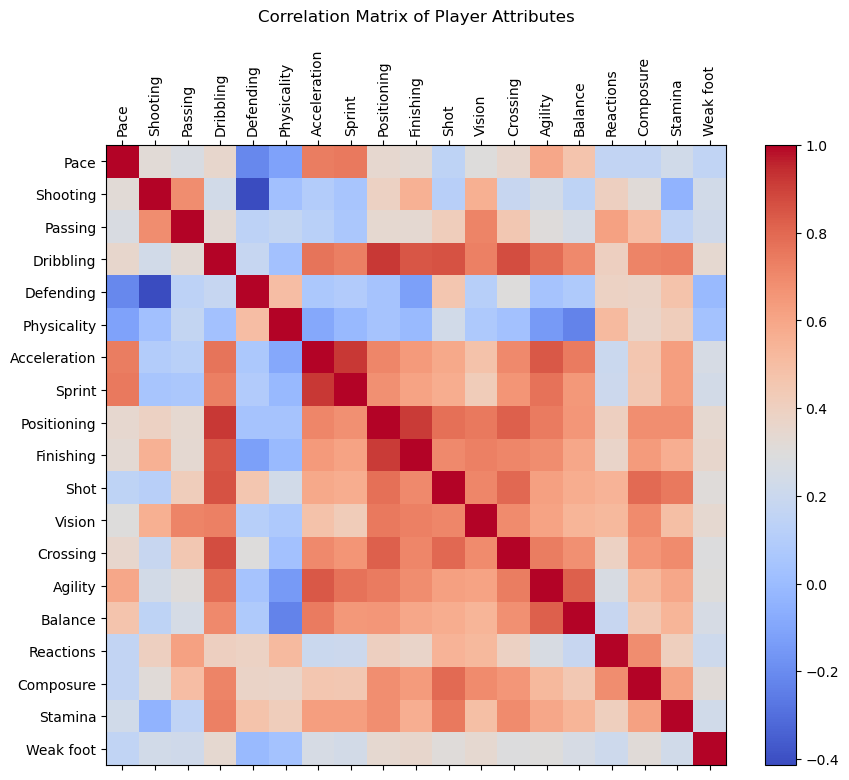

,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,Sprint,Positioning,Finishing,Shot,Vision,Crossing,Agility,Balance,Reactions,Composure,Stamina,Weak foot
Pace,1.000000,0.319869,0.265820,0.355757,-0.213784,-0.113438,0.739387,0.746638,0.346719,0.328643,0.146492,0.293042,0.348633,0.594935,0.466573,0.164987,0.160815,0.227603,0.159013
Shooting,0.319869,1.000000,0.685313,0.232535,-0.414305,0.025619,0.096737,0.055152,0.389863,0.557095,0.118967,0.559365,0.187050,0.238788,0.146318,0.402345,0.314542,-0.041630,0.232713
Passing,0.265820,0.685313,1.000000,0.323879,0.138572,0.166426,0.122691,0.065426,0.340438,0.335356,0.416126,0.716109,0.449022,0.298546,0.248946,0.613365,0.499525,0.152674,0.224879
Dribbling,0.355757,0.232535,0.323879,1.000000,0.177835,0.027723,0.762807,0.732201,0.917395,0.850100,0.860024,0.727109,0.872009,0.784991,0.700643,0.401884,0.714985,0.725425,0.339348
Defending,-0.213784,-0.414305,0.138572,0.177835,1.000000,0.502421,0.071040,0.091063,0.041913,-0.123891,0.453734,0.111374,0.293130,0.042074,0.081419,0.382146,0.372270,0.474311,-0.008784
Physicality,-0.113438,0.025619,0.166426,0.027723,0.502421,1.000000,-0.093728,-0.012973,0.040934,-0.006322,0.234588,0.074289,0.031825,-0.147677,-0.227311,0.514804,0.366862,0.417659,0.037041
Acceleration,0.739387,0.096737,0.122691,0.762807,0.071040,-0.093728,1.000000,0.919173,0.708579,0.641208,0.589168,0.475595,0.699815,0.841395,0.740929,0.204034,0.455900,0.625619,0.257624
Sprint,0.746638,0.055152,0.065426,0.732201,0.091063,-0.012973,0.919173,1.000000,0.678909,0.610855,0.572525,0.423501,0.659455,0.768555,0.650487,0.207477,0.448219,0.625831,0.239660
Positioning,0.346719,0.389863,0.340438,0.917395,0.041913,0.040934,0.708579,0.678909,1.000000,0.914661,0.777067,0.750021,0.820382,0.742126,0.655253,0.400065,0.680025,0.680319,0.340446
Finishing,0.328643,0.557095,0.335356,0.850100,-0.123891,-0.006322,0.641208,0.610855,0.914661,1.000000,0.698655,0.724321,0.711624,0.687618,0.591264,0.366149,0.640551,0.567061,0.358816


In [10]:
# Select relevant attributes for correlation analysis
attributes = [
    'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
    'Acceleration', 'Sprint', 'Positioning', 'Finishing', 'Shot', 'Vision',
    'Crossing', 'Agility', 'Balance', 'Reactions', 'Composure', 'Stamina', 'Weak foot'
]
# Calculate the correlation matrix
correlation_matrix = df[attributes].corr()

# Plot correlation matrix
plt.figure(figsize=(10,8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(attributes)), attributes, rotation=90)
plt.yticks(range(len(attributes)), attributes)
plt.colorbar()
plt.title('Correlation Matrix of Player Attributes', pad=20)
plt.show()

correlation_matrix

<b>Strong Correlations:</b></br>

<b>Dribbling and Positioning (0.92):</b> Players with high dribbling skills tend to have excellent positioning.</br>
<b>Finishing and Positioning (0.91):</b> Players who are good at finishing are also strong in positioning, which is essential for goal-scoring opportunities.</br>
<b>Acceleration and Sprint Speed (0.92):</b> As expected, these two attributes are closely related.</br>
<b>Agility and Dribbling (0.78):</b> Agility plays a significant role in a players dribbling ability.</br></br>
<b>Negative Correlations:</b></br>

<b>Defending and Shooting (-0.41):</b> Players who are strong in defending tend to be weaker in shooting, likely due to the different skill sets required for these roles.</br>
<b>Defending and Pace (-0.21):</b> A slight negative correlation indicates that faster players may not always be strong defenders.</br>

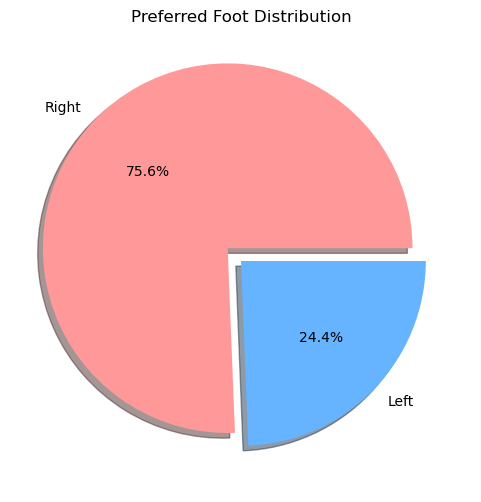

In [11]:
# Display the proportion of right-footed players vs. left-footed players.
foot_count = df['Preferred foot'].value_counts()

colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)  

plt.figure(figsize=(6, 6))
plt.pie(foot_count, labels=foot_count.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.title('Preferred Foot Distribution')
plt.show()

<b>Right or Left?:</b> Right-footed players make up an overwhelming majority at 75%. Left-footed players are a highly
sought after due to they're scarcity.

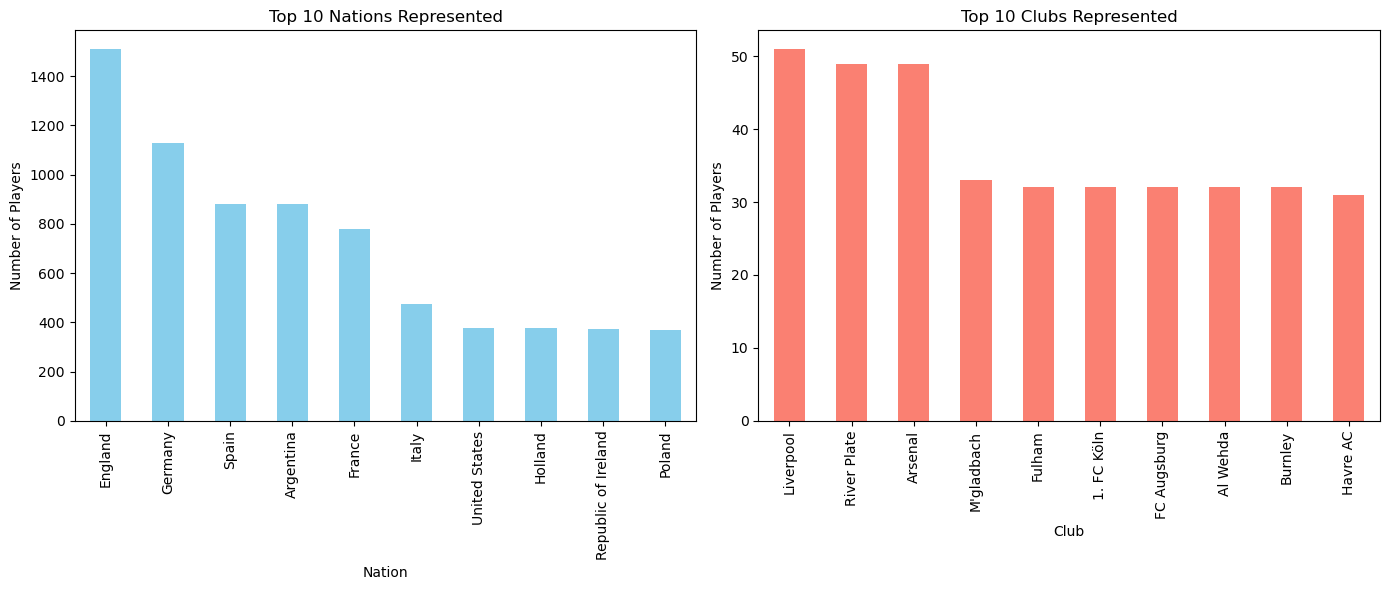

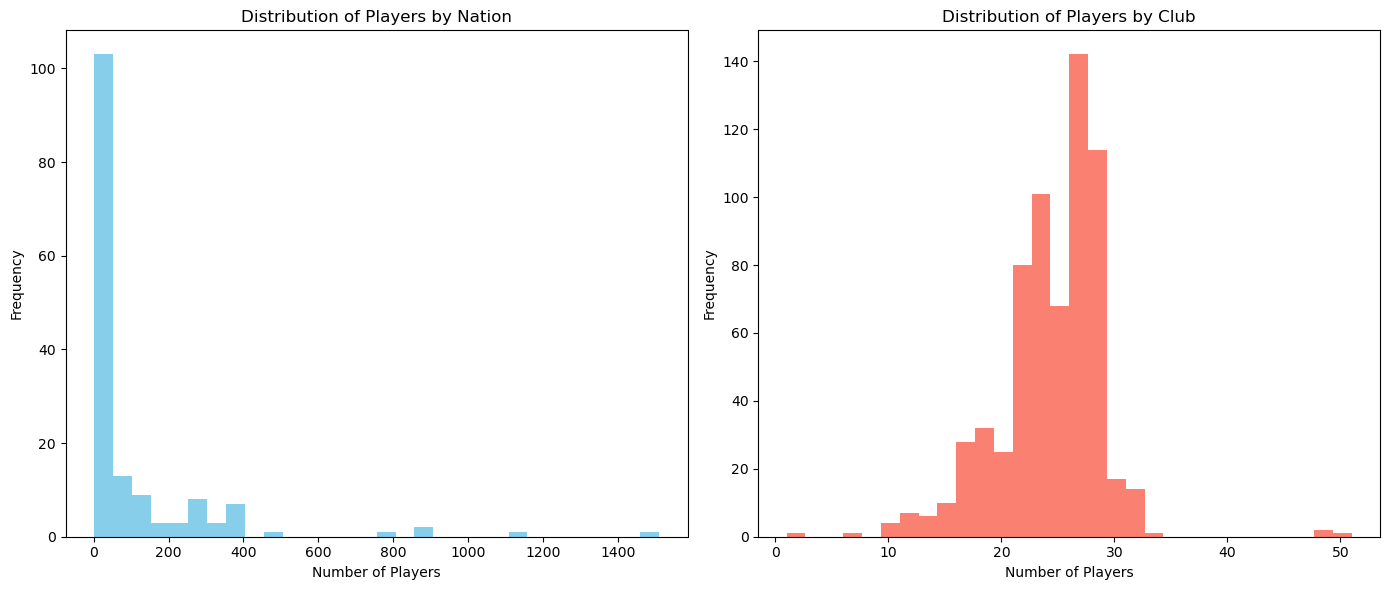

In [12]:
# Plotting the distributions of Nation and Club
plt.figure(figsize=(14, 6))

# Top 10 Nations
top_nations = df['Nation'].value_counts().head(10)
plt.subplot(1, 2, 1)
top_nations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Nations Represented')
plt.xlabel('Nation')
plt.ylabel('Number of Players')

# Top 10 Clubs
top_clubs = df['Club'].value_counts().head(10)
plt.subplot(1, 2, 2)
top_clubs.plot(kind='bar', color='salmon')
plt.title('Top 10 Clubs Represented')
plt.xlabel('Club')
plt.ylabel('Number of Players')

plt.tight_layout()
plt.show()

# Distribution of all Nations and Clubs
plt.figure(figsize=(14, 6))

# Nation Distribution
plt.subplot(1, 2, 1)
df['Nation'].value_counts().plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribution of Players by Nation')
plt.xlabel('Number of Players')
plt.ylabel('Frequency')

# Club Distribution
plt.subplot(1, 2, 2)
df['Club'].value_counts().plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Players by Club')
plt.xlabel('Number of Players')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<b>Top 10 Nations and Clubs Represented:</b></br>

The first chart displays the top 10 nations with the most players represented in the dataset. England is birthplace of football (soccer) and has a well established professional league system, which explains why it has the highest number of players in the professional leagues.</b></b>
The second chart shows the top 10 clubs with the most players, indicating the clubs that have a significant representation in the dataset. Most clubs have 35 or less players except for Liverpool, River Plate, and Arsenal which have around 15 more players than the next closest team. This can result in a large wage bill which may not be sustainable.</br>
<br><b>Distribution of Players by Nation and Club:</b></br>

The third chart provides a histogram of the distribution of players by nation. It shows how the players are spread across different countries, with a few countries having a large number of players, but most countries with fewer.</br>
The fourth chart illustrates the distribution of players by club. Most clubs have a squad size between 20 and 30.

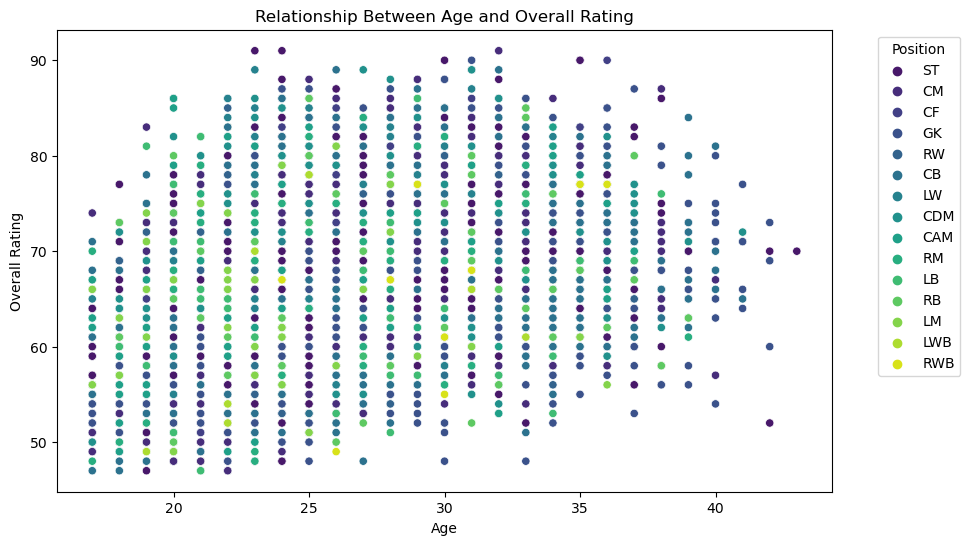

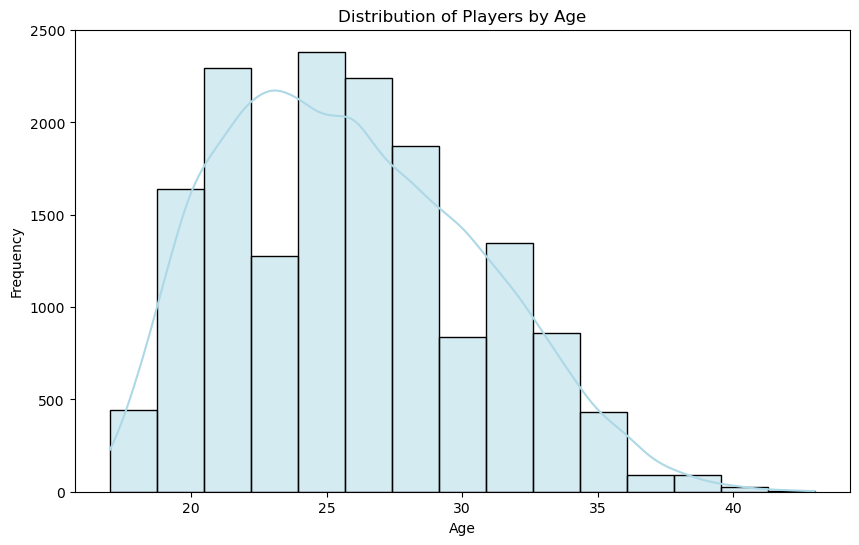

In [13]:
# Scatter plot to analyze the relationship between Age and Overall rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Overall'], hue=df['Position'], palette='viridis')
plt.title('Relationship Between Age and Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='lightblue')
plt.title('Distribution of Players by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Relationship Between Age and Overall Rating:** </br>

The scatter plot illustrates the relationship between a player's age and their overall rating. Different positions are highlighted with distinct colors.</br></br>
**Observations:**</br>
**Younger Players (Early 20s):** Typically, younger players exhibit a broad range of overall ratings, with some emerging stars showing very high ratings. This suggests that exceptional talent is recognized early.</br>
**Prime Age (Mid-20s to Early 30s):** The majority of top-rated players are in this age group, reflecting the peak performance years for footballers where experience and physical condition are optimal.</br>
**Older Players (30+):** While still highly rated, players in this age bracket generally have a slight decline in overall ratings. However, exceptions exist, particularly for those with significant technical skills or tactical intelligence.</br></br>
**Age Distribution:** </br>

The histogram with a kernel density estimate (KDE) shows the distribution of player ages in the dataset.</br></br>
**Observations:** </br>
The distribution indicates a concentration of players in their mid-20s to early 30s, which aligns with the typical peak performance age in professional football.</br>
There is a noticeable tail extending into the mid-to-late 30s, representing experienced players who still maintain high performance levels.</br></br>

**Talent Identification:** Younger players with high ratings could be strategic acquisition targets, as they represent both instant value and long-term potential.</br>
**Player Contract Management:** Understanding the age-performance relationship helps in making informed decisions about player contracts, transfers, and retirements. It also underscores the importance of maintaining a balanced team with both youthful energy and veteran experience.</br>
**Strategic Planning:** This analysis suggests that investment in player development should focus not just on acquiring top talent but also on maintaining players' performance through their prime years, ensuring peak contributions to the team.

In [14]:
# Find the youngest player
youngest_player = df['Age'].min()

# Find the oldest player
oldest_player = df['Age'].max()

print(f"The yougest player is {youngest_player}.")
print(f"The oldest player is {oldest_player}.")

The yougest player is 17.
The oldest player is 43.


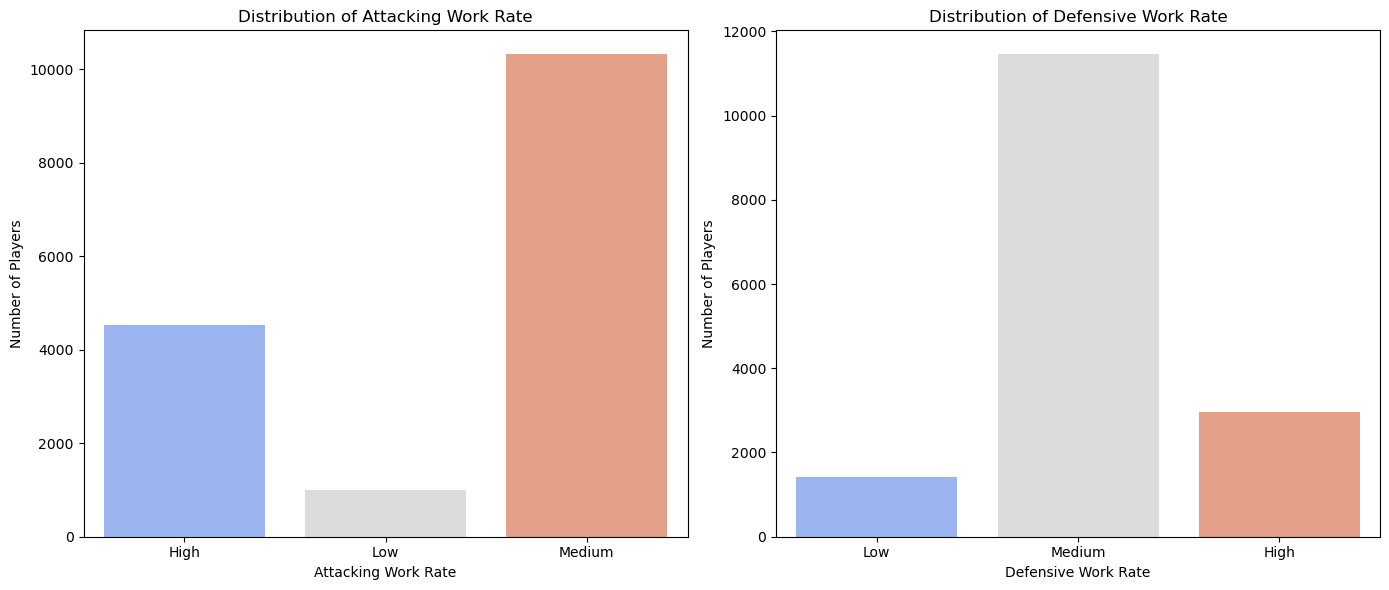

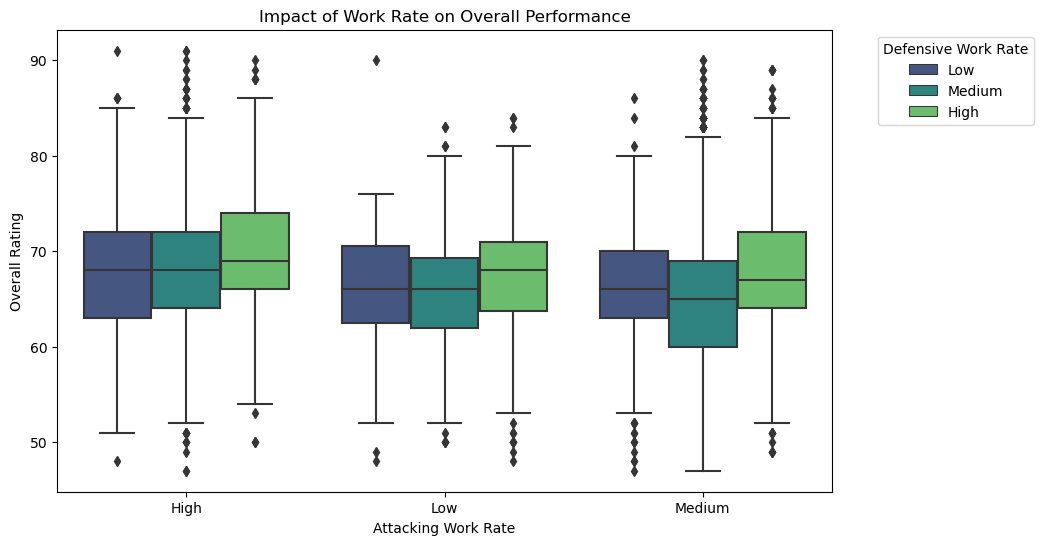

In [15]:
# Analyze the relationship between Work Rate and Player Roles
# Examine the distribution of Attacking and Defensive Work Rates

# Plotting the distribution of Attacking Work Rate
plt.figure(figsize=(14, 6))

# Attacking Work Rate Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Att work rate', palette='coolwarm')
plt.title('Distribution of Attacking Work Rate')
plt.xlabel('Attacking Work Rate')
plt.ylabel('Number of Players')

# Defensive Work Rate Distribution
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Def work rate', palette='coolwarm')
plt.title('Distribution of Defensive Work Rate')
plt.xlabel('Defensive Work Rate')
plt.ylabel('Number of Players')

plt.tight_layout()
plt.show()

# Analyze the impact of Work Rate on Performance (Overall Rating)
plt.figure(figsize=(10, 6))

# Combine Attacking and Defensive Work Rates to see their combined impact on Overall Rating
sns.boxplot(data=df, x='Att work rate', y='Overall', hue='Def work rate', palette='viridis')
plt.title('Impact of Work Rate on Overall Performance')
plt.xlabel('Attacking Work Rate')
plt.ylabel('Overall Rating')
plt.legend(title='Defensive Work Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Work Rate Distribution:** </br>

**Attacking Work Rate:**
The first chart shows the distribution of players based on their attacking work rate. It indicates how many players are categorized as having high, medium, or low attacking work rates.</br>
**Observations:** 
A significant number of players have a high or medium attacking work rate, which is typical for players who are more involved in offensive plays.</br></br>
**Defensive Work Rate:**
The second chart shows the distribution of players based on their defensive work rate. It illustrates the breakdown of players with high, medium, or low defensive work rates.</br>
**Observations:**
Similar to attacking work rates, a large number of players have medium or high defensive work rates, reflecting the importance of defensive contribution in modern football.</br></br>
**Impact of Work Rate on Performance:** </br>

The boxplot displays the impact of different combinations of attacking and defensive work rates on overall player ratings.</br>
**Observations:** </br>
Players with a high attacking work rate generally tend to have higher overall ratings, especially when paired with a medium or high defensive work rate. This indicates that players who contribute both offensively and defensively are often more highly rated.</br>
Conversely, players with a low attacking or defensive work rate tend to have lower overall ratings, suggesting that balanced contributions in both attack and defense are valued in determining a player’s overall rating.</br></br>

**Player Roles and Tactical Fit:** Understanding the distribution of work rates can help in identifying players who fit specific tactical roles. For example, players with high attacking and defensive work rates might be ideal for high-intensity pressing systems, while those with lower work rates could be more suited to specialized roles.</br>
**Performance Optimization:** The analysis indicates that players with balanced high work rates in both attack and defense tend to perform better overall. This insight can guide decisions related to player development, training focus, and recruitment strategies.</br>
**Strategic Decision-Making:** This analysis highlights the importance of considering work rate as a key factor when evaluating player performance and potential. Investing in players with high work rates, especially in both attack and defense, could yield better overall team performance.

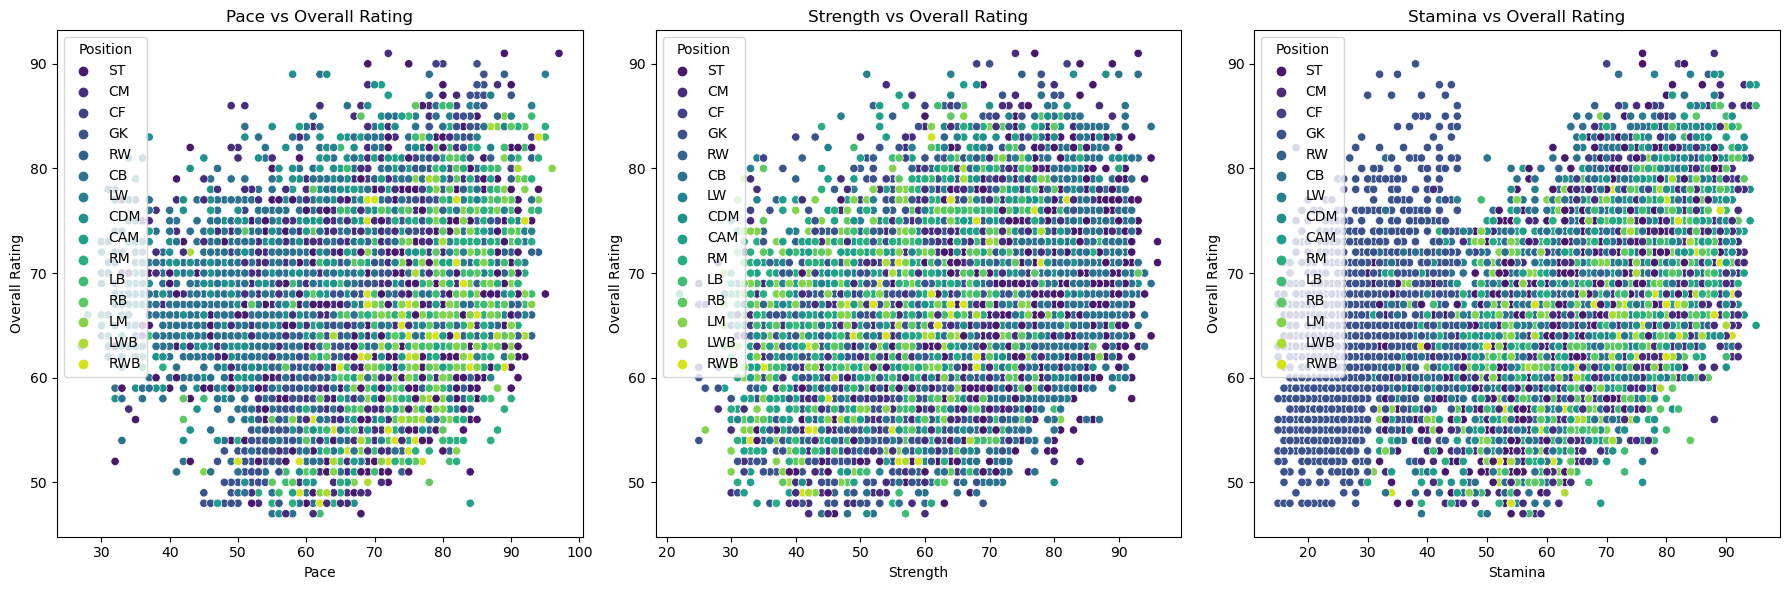

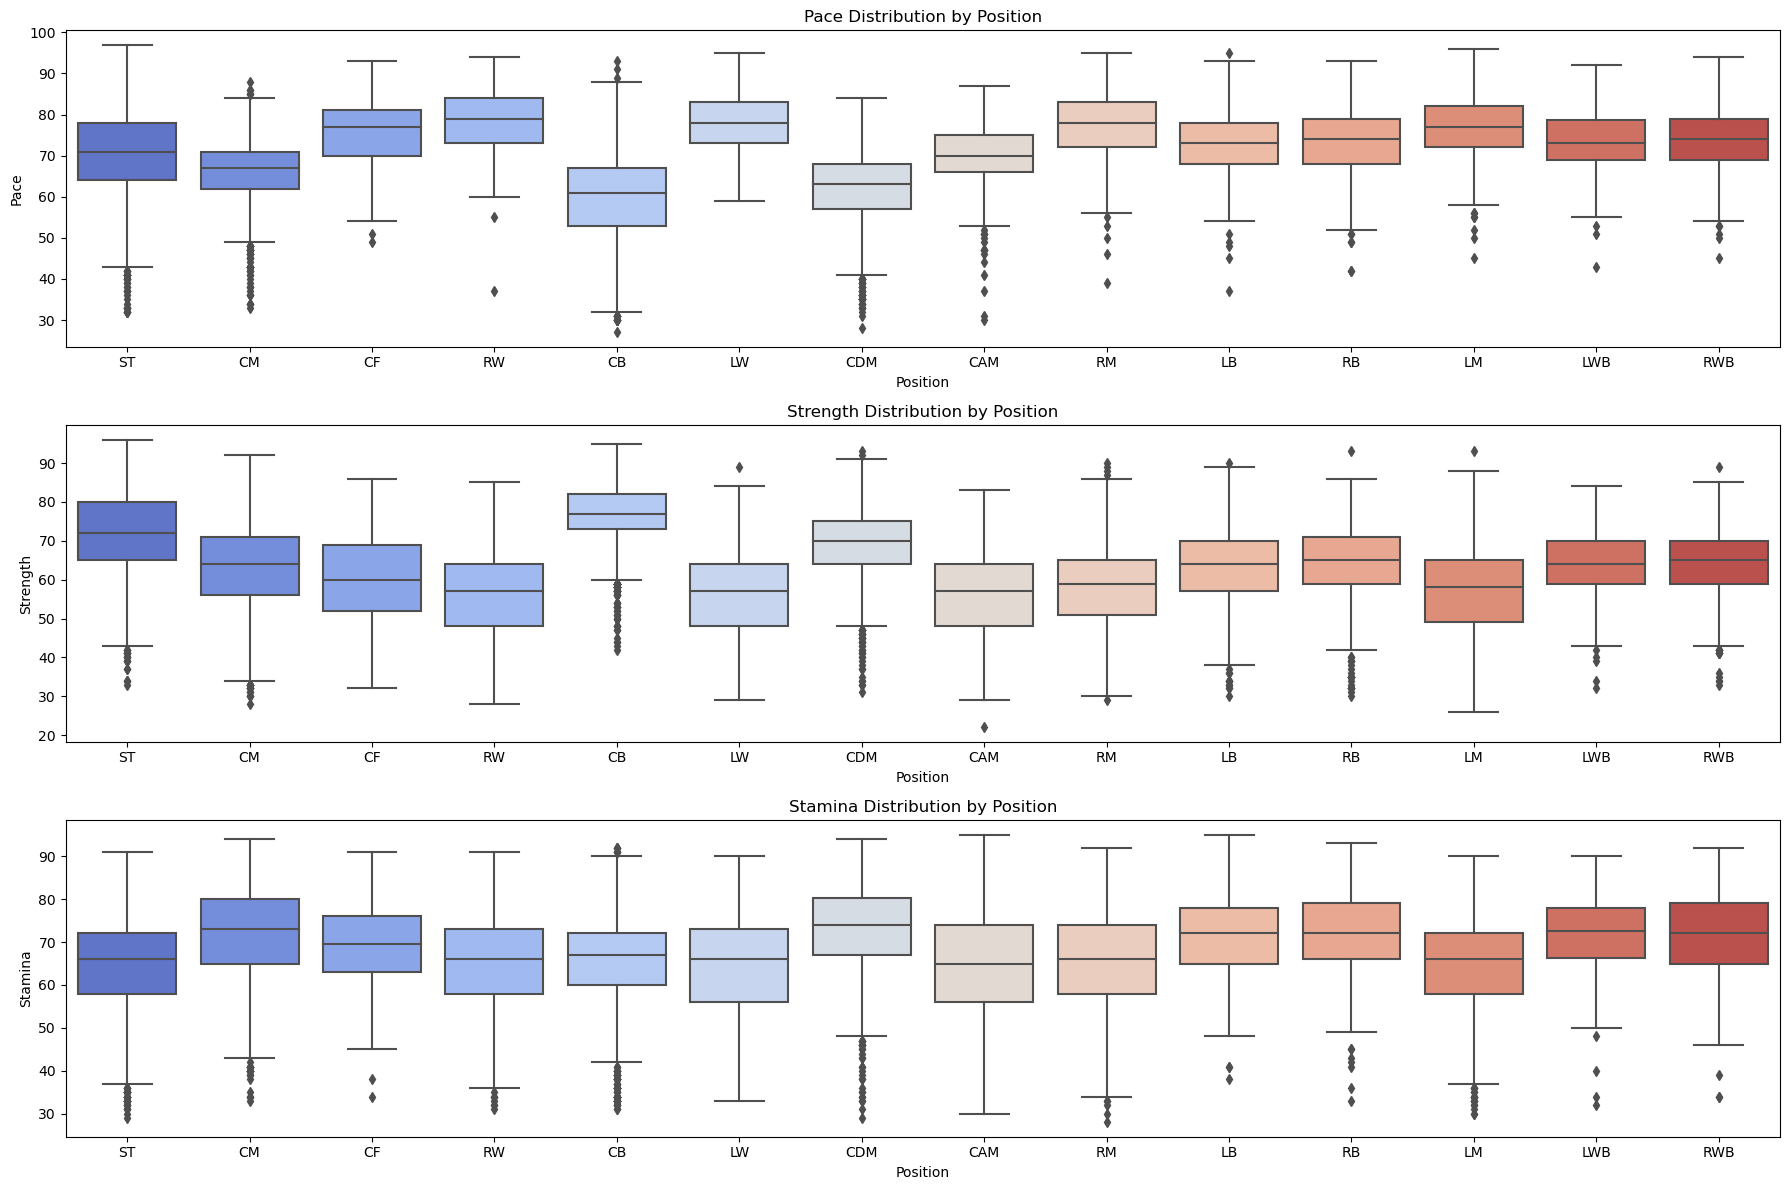

In [16]:
# Analyzing the relationship of physical attributes vs. overall rating
# We'll focus on key physical attributes: Pace, Strength, and Stamina.

# Creating scatter plots for each physical attribute against Overall Rating
plt.figure(figsize=(18, 6))

# Pace vs Overall Rating
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['Pace'], y=df['Overall'], hue=df['Position'], palette='viridis')
plt.title('Pace vs Overall Rating')
plt.xlabel('Pace')
plt.ylabel('Overall Rating')

# Strength vs Overall Rating
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Strength'], y=df['Overall'], hue=df['Position'], palette='viridis')
plt.title('Strength vs Overall Rating')
plt.xlabel('Strength')
plt.ylabel('Overall Rating')

# Stamina vs Overall Rating
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['Stamina'], y=df['Overall'], hue=df['Position'], palette='viridis')
plt.title('Stamina vs Overall Rating')
plt.xlabel('Stamina')
plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

# Position-specific analysis based on physical attributes
# Create boxplots for each position group to see the spread of physical attributes and overall ratings

# Define positions of interest: Forwards (ST), Midfielders (CM), Defenders (CB), and Goalkeepers (GK)
positions_of_interest = [position for position in df['Position'].unique() if position != 'GK']

plt.figure(figsize=(18, 12))

# Pace Distribution by Position
plt.subplot(3, 1, 1)
sns.boxplot(x='Position', y='Pace', data=df[df['Position'].isin(positions_of_interest)], palette='coolwarm')
plt.title('Pace Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Pace')

# Strength Distribution by Position
plt.subplot(3, 1, 2)
sns.boxplot(x='Position', y='Strength', data=df[df['Position'].isin(positions_of_interest)], palette='coolwarm')
plt.title('Strength Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Strength')

# Stamina Distribution by Position
plt.subplot(3, 1, 3)
sns.boxplot(x='Position', y='Stamina', data=df[df['Position'].isin(positions_of_interest)], palette='coolwarm')
plt.title('Stamina Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Stamina')

plt.tight_layout()
plt.show()


**Overall Relationship Between Selected Physical Attributes and Rating:** </br>

The scatter plots show the relationship between each selected physical attribute (Pace, Strength, Stamina) and the overall rating of players, categorized by their positions.</br>
**Observations:** </br>
**Pace:** Faster players, particularly those in forward positions like strikers (ST) and wingers (RW, LW), tend to have higher overall ratings. Pace is a critical factor in attacking roles.</br>
**Strength:** Players with higher strength, especially in defensive positions (CB, LB, RB, CDM), generally have higher overall ratings. Strength is crucial for defenders who need to win physical battles.</br>
**Stamina:** Higher stamina correlates with higher overall ratings across most positions, reflecting the importance of endurance in maintaining high performance levels throughout a match.</br></br>
**Position-Specific Analysis:** </br>

The boxplots compare overall ratings within specific positions, showing how the physical attributes correlate with ratings for players in different roles.</br>
**Observations:** </br></br>
**Forwards (ST, CF):** High pace and stamina are particularly beneficial, leading to higher overall ratings. Strength is less critical but still contributes to the overall effectiveness.
**Midfielders (CM, CAM, CDM):** Midfielders benefit significantly from a balance of all three attributes—pace, strength, and stamina—reflecting the versatile demands of these roles.</br>
**Defenders (CB, LB, RB):** Strength is most critical for defenders, followed by stamina. Pace is also important, particularly for full-backs who need to track back quickly.</br></br>

**Player Role Optimization:** The analysis highlights the importance of tailoring physical training to the specific demands of a player's position. For example, developing stamina is essential for midfielders, while pace and strength are key for forwards and defenders, respectively.</br>
**Strategic Recruitment:** This insight can guide recruitment strategies by identifying which physical attributes are most crucial for enhancing team performance in specific roles. For instance, acquiring fast, strong defenders or stamina-rich midfielders could be prioritized based on team needs.</br>
**Performance Enhancement:** Understanding the impact of these physical attributes on overall ratings can inform individualized training programs aimed at boosting specific attributes that are most beneficial for a player's position.


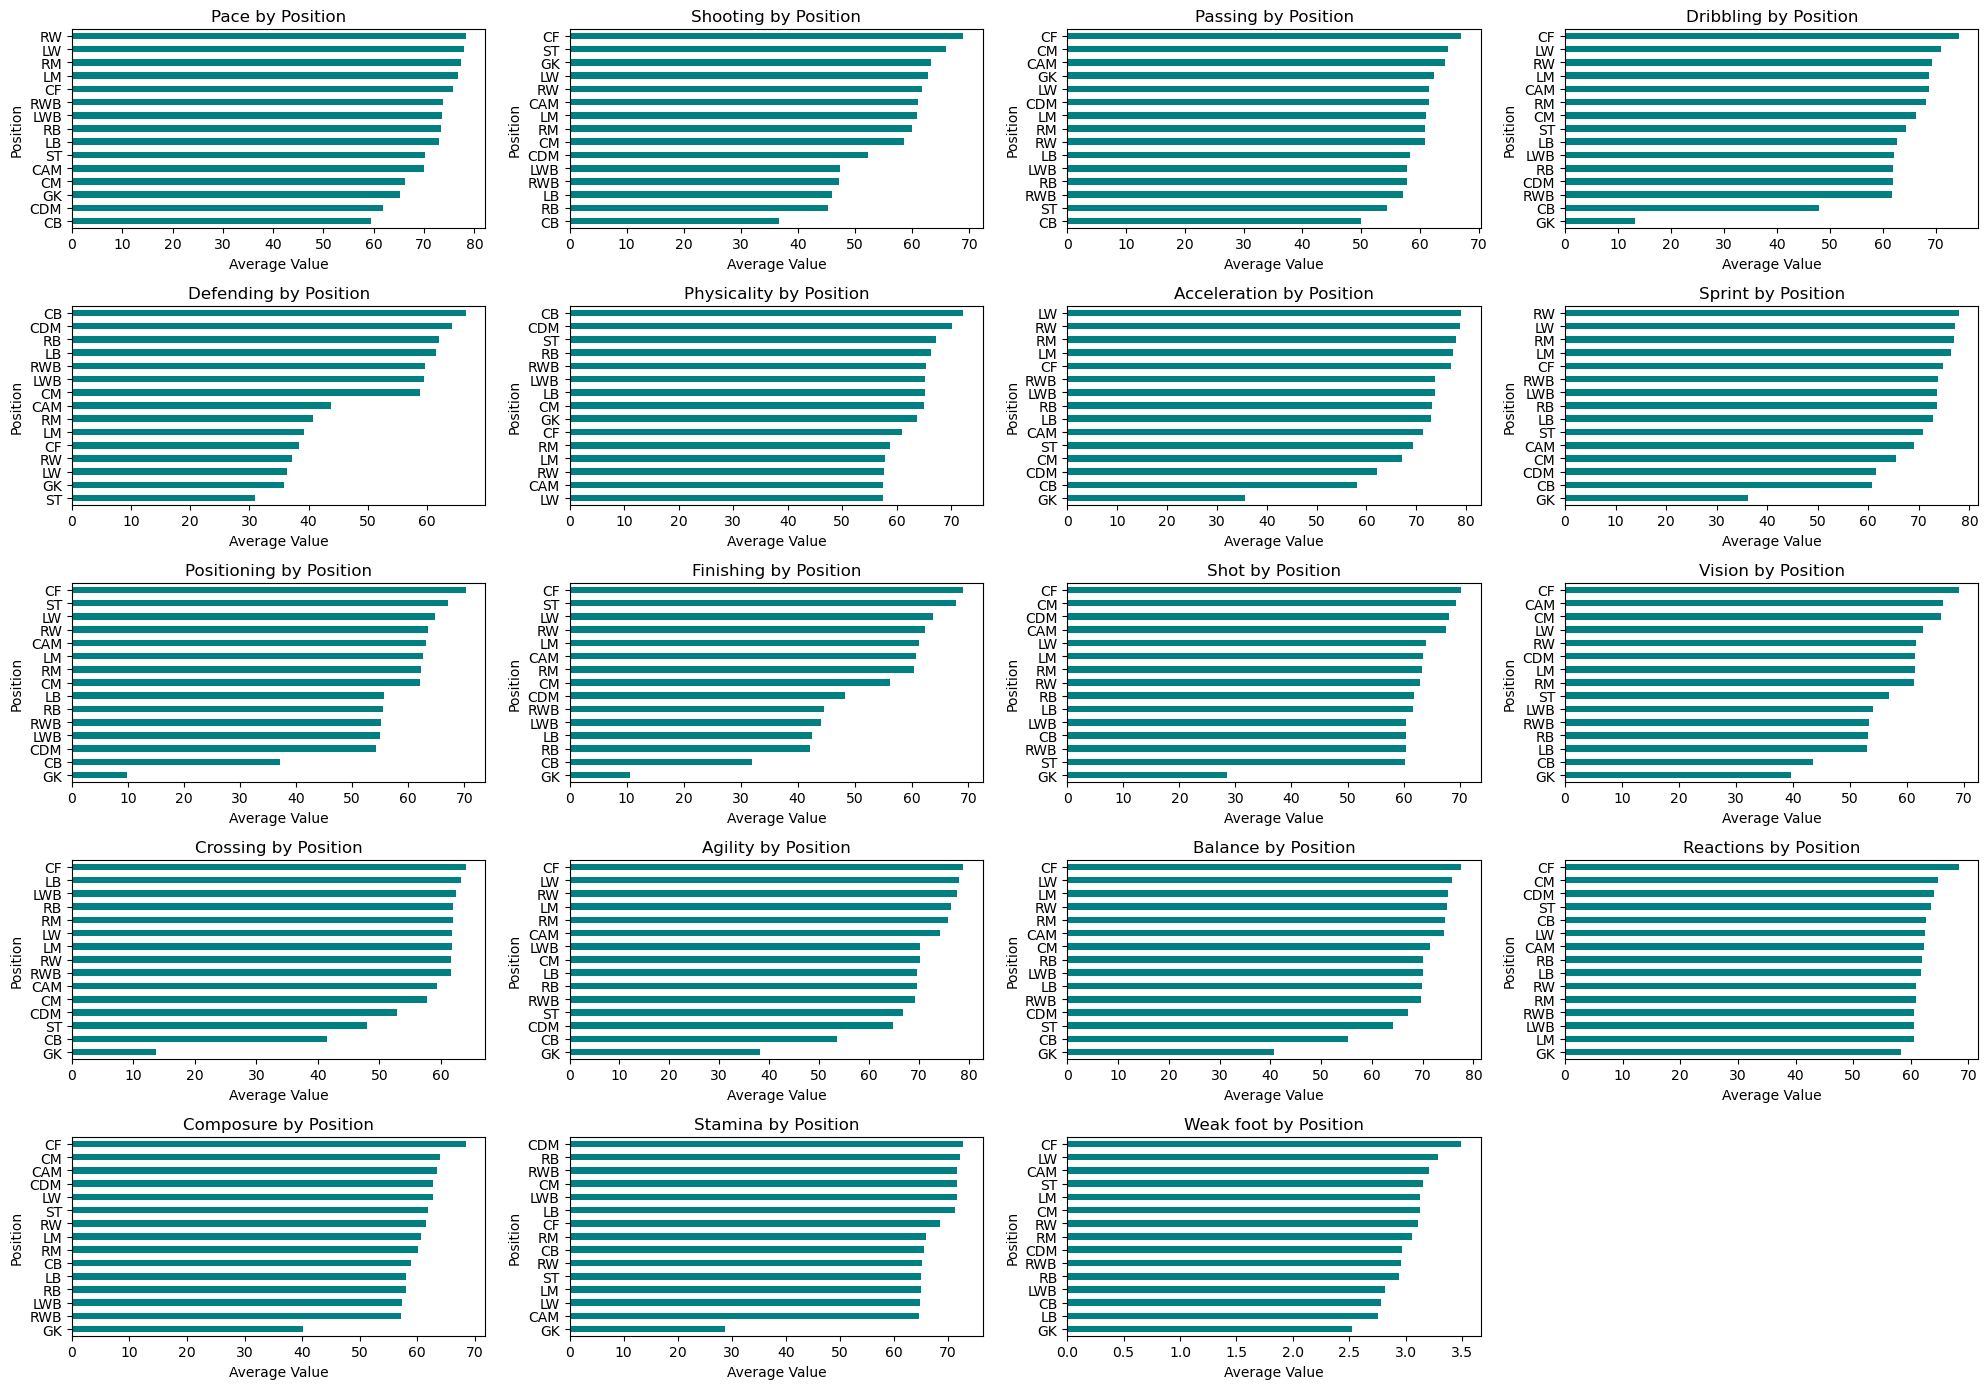

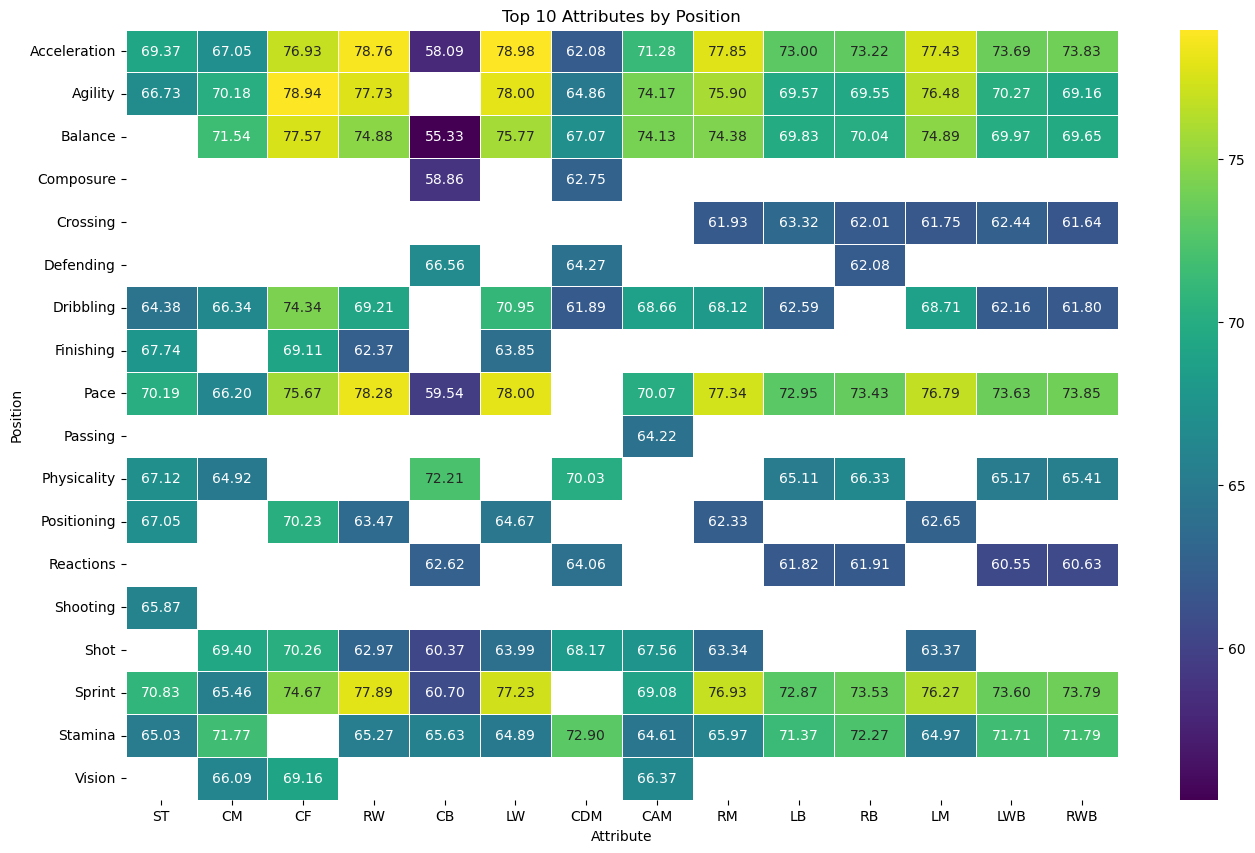

In [17]:
# Analyze attribute distribution across all positions and highlight top skills/attributes by position

# Drop the GK position from the analysis
positions_of_interest = [position for position in df['Position'].unique() if position != 'GK']

# Use the same attributes defined at the beginning of this analysis
# Calculate the average of each attribute for every position
position_attribute_means = df.groupby('Position')[attributes].mean()

# Plot the attribute distribution across all positions
plt.figure(figsize=(20, 14))

for i, attribute in enumerate(attributes):
    plt.subplot(5, 4, i+1)
    position_attribute_means[attribute].sort_values().plot(kind='barh', color='teal')
    plt.title(f'{attribute} by Position')
    plt.xlabel('Average Value')
    plt.ylabel('Position')

plt.tight_layout()
plt.show()

# Highlight top 10 attributes by position 

# Function to get the top 10 attributes for each position
def top_attributes_per_position(position_data, attributes):
    top_attributes = position_data[attributes].mean().sort_values(ascending=False).head(10)
    return top_attributes

# Creating a detailed breakout of attributes for each position
detailed_breakout = {}
for position in positions_of_interest:
    position_data = df[df['Position'] == position]
    detailed_breakout[position] = top_attributes_per_position(position_data, attributes)

# Converting the breakout to a DataFrame for better presentation
detailed_breakout_df = pd.DataFrame(detailed_breakout)

# Heatmap to visualize the top 10 attributes by position
plt.figure(figsize=(16, 10))

sns.heatmap(detailed_breakout_df, annot=True, cmap='viridis', linewidths=.5, fmt=".2f")
plt.title('Top 10 Attributes by Position')
plt.xlabel('Attribute')
plt.ylabel('Position')
plt.show()

**Overview:** </br>
The heatmap presented illustrates the top 10 skills per position based on average attribute values across different football positions. Each position is compared against key attributes such as Pace, Acceleration, Agility, Balance, and others that define a player's capability in specific roles. The darker shades in the heatmap indicate higher average values, signaling areas where players in those positions excel.</br></br>

**Observations:** </br></br>
**Forward Positions (ST, CF, RW, LW):** Prioritize attributes that enhance their ability to score goals and outpace defenders, with a strong emphasis on Pace, Finishing, and Dribbling.</br>

**Midfield Positions (RM, LM, CM, CAM, CDM):** Exhibit a balanced skill set, with a focus on Passing, Vision, and Ball Control to facilitate both offensive and defensive plays.</br>

**Defensive Positions (CB, LB, RB, LWB, RWB):** </br>

**Defending and Physicality:** Highlight attributes related to physicality and defensive capabilities, such as Defending, Strength, and Tackling, to protect their goal.</br></br>

**Player Development:** </br>

**Customized Training:** Coaches should focus on enhancing the key attributes that align with a player’s position. For example, training wingers on agility and balance, while focusing on stamina and physicality for defensive midfielders.</br>
**Youth Development:** For developing players, identifying potential roles early based on their natural strengths in these attributes can help streamline their growth and improve their effectiveness in their eventual positions.</br></br>

**Recruitment Strategy:** </br>
**Targeted Recruitment:** When recruiting, teams should prioritize players whose strengths align with the key attributes required for their intended position. For example, acquiring physically strong and fast defenders, or technically gifted midfielders with high stamina.</br>
**Balancing Team Dynamics:** Ensuring a balanced mix of players with complementary strengths can enhance overall team performance, allowing for tactical flexibility and robust defensive and offensive capabilities.</br></br>

**Tactical Adjustments:** </br>

**Leveraging Strengths:** Coaches can adjust tactics to leverage the strengths of their players, such as deploying wingers with high pace and crossing ability in formations that emphasize wide play. </br>
**Addressing Weaknesses:** Identifying any gaps in key attributes can help in making informed decisions about transfers, training focus, or tactical shifts to mitigate potential weaknesses on the field.</br>
